# PCA and Regularization

## Goal - Predict news popularity 

## Input
data from [UCI Machine Learning Repository: Online News Popularity](https://archive-beta.ics.uci.edu/ml/datasets/online+news+popularity) 

In [ ]:
# import libraries 

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, lasso_path
from sklearn.pipeline import make_pipeline
import time
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from scipy import stats
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# Read in the CSV
df = pd.read_csv('OnlineNewsPopularity.csv')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
# Almost all data types are numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
# Check for any null values --> NONE
missing = df.isnull().sum()
print(missing)

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [ ]:
# General description
overall = df.describe().T
print(overall)

                                  count           mean            std  \
 timedelta                      39644.0     354.530471     214.163767   
 n_tokens_title                 39644.0      10.398749       2.114037   
 n_tokens_content               39644.0     546.514731     471.107508   
 n_unique_tokens                39644.0       0.548216       3.520708   
 n_non_stop_words               39644.0       0.996469       5.231231   
 n_non_stop_unique_tokens       39644.0       0.689175       3.264816   
 num_hrefs                      39644.0      10.883690      11.332017   
 num_self_hrefs                 39644.0       3.293638       3.855141   
 num_imgs                       39644.0       4.544143       8.309434   
 num_videos                     39644.0       1.249874       4.107855   
 average_token_length           39644.0       4.548239       0.844406   
 num_keywords                   39644.0       7.223767       1.909130   
 data_channel_is_lifestyle      39644.0       0.052

In [ ]:
# Renaming a few columns for better understandability
# NOTE: Most col names have 1 leading space
# Remove leading whitespaces in the header names

df.columns=df.columns.str.replace(' ','')
df.columns=df.columns.str.replace('tokens','words')
df.columns=df.columns.str.replace('token','word')

values = {
        'columns' : {'kw_min_min': 'worst_kw_min',              
                    'kw_max_min': 'worst_kw_max',                  
                    'kw_avg_min': 'worst_kw_avg',      
                    'kw_min_max': 'best_kw_min',        
                    'kw_max_max': 'best_kw_max',        
                    'kw_avg_max': 'best_kw_avg',       
                    'kw_min_avg': 'avg_kw_min',                   
                    'kw_max_avg': 'avg_kw_max',                   
                    'kw_avg_avg': 'avg_kw_avg'},
        'inplace' : True
        }
 
# call rename () method
df.rename(**values)

### LDA explanation

"An LDA topic model is a model with a three-level hierarchical Bayesian model. 
The basic assumption of this model is a combination of words belonging to different topics [16]. 
LDA suggests that there may be multiple topics in an article and that the wording in that article or paper reflects the exact set of topics that the reporter wished to address. 
Using Gibbs Sampling techniques, a method that estimates the marginal distribution of interested variables, we can determine the topics among the data pool"

(SOURCE: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6371067/ )

In [ ]:
# Get the statistics of target variable - shares
data = df[df.keys()[-1]]
data.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
# Exclude the URL (start of DF) and shares columns (end of DF)
features = list(df.columns[1:60])
target = 'shares'

array([[<AxesSubplot:title={'center':'num_imgs'}>]], dtype=object)

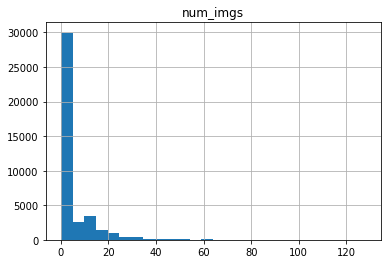

In [ ]:
# Majority of news have less than 5 images
df.hist(column='num_imgs', bins = 26)

array([[<AxesSubplot:title={'center':'num_videos'}>]], dtype=object)

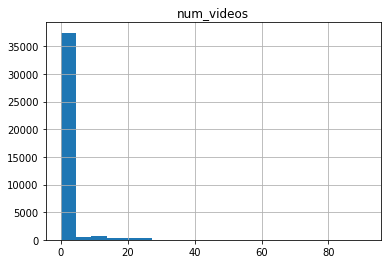

In [ ]:
# Majority of news have less than 5 videos
df.hist(column='num_videos', bins = 20)

In [ ]:
# checking statistcs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_words_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_words_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_words,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_words,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [ ]:
# Study correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,timedelta,n_words_title,n_words_content,n_unique_words,n_non_stop_words,n_non_stop_unique_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_word_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,worst_kw_min,worst_kw_max,worst_kw_avg,best_kw_min,best_kw_max,best_kw_avg,avg_kw_min,avg_kw_max,avg_kw_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,0.130465,0.046884,0.054492,-0.049109,0.055788,0.076287,0.083277,-0.170250,0.591199,0.029503,0.133225,-0.076590,-0.637824,-0.493093,-0.157204,-0.051820,-0.163164,-0.011438,-0.014501,-0.015655,-0.006129,-0.005781,0.009961,0.004042,-0.002853,-0.004067,0.004226,0.000272,0.080894,0.004423,-0.141713,-0.030838,0.092906,0.133837,0.158646,0.207604,0.010266,0.198654,-0.071968,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_words_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.070815,0.132791,-0.023902,-0.090394,-0.046716,0.049223,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,0.004274,0.009322,0.008935,-0.015472,-0.002015,-0.015013,0.006289,-0.005996,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_words_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,0.037548,0.060200,-0.006105,0.033424,0.025408,0.055989,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,-0.002484,-0.004027,-0.016891,-0.007395,-0.015949,0.034538,0.036394,0.052024,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_words,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,-0.001653,0.011016,-0.000264,-0.000945,-0.002328,-0.005535,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002142,0.010538,-0.002224,-0.002248,-0.001398,-0.002563,-0.001803,-0.003186,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000314,0.010903,-0.000012,-0.000078,0.000061,-0.002702,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.002147,0.010501,-0.002517,-0.002360,-0.001963,-0.001508,-0.001338,-0.002082,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_uniq

### Method 1: Z-score handle outliers

In [ ]:
#Define outliers as Z-score greater than 3
#z-score = (x = mean)/sq
z = np.abs(stats.zscore(df[target]))
threshold = 3
out = np.where(z > threshold)

print(len(out[0]))
print(df.shape)
#df.iloc[out]

308
(39644, 61)


Setting a threshold of 3 STD gives us potentially ~900 outliers out of our total of ~40,000 rows in our dataset. Looking at the ranges of this if we go to the 'shares' column gives us an outlier range of 38,400 - 843,300

### Method 2: Interquartile Range (IQR) method to handle outliers
- Why? IQR is based upon the median value instead of taking something like the avg, IQR will end up centering around what is a median # which is going to be in the middle of the dataset and then use that to calculate what should be the expected quantiles (25% sections) next to it. This should handle outliers a lot better and end up dropping most extreme values far from the center

SOURCE: https://github.com/Aryan580/Online-News-Popularity/blob/master/Online%20News%20Popularity.ipynb 

In [ ]:
# Define our quantiles 
Q1 = df.quantile(q = 0.25) 
Q3 = df.quantile(q = 0.75)
IQR = Q3 - Q1

print("Q1 for 'shares':", Q1['shares'])
print("Q3 for 'shares':", Q3['shares'])
print("IQR for 'shares':", IQR['shares'])

Q1 for 'shares': 946.0
Q3 for 'shares': 2800.0
IQR for 'shares': 1854.0


In [ ]:
# Sort DF by the 'shares' col
sorted_shares = df.sort_values('shares') 

# Take the median of our now sorted 'shares'
median = sorted_shares['shares'].median() 

# Apply IQR to the 'shares' col
q1 = sorted_shares['shares'].quantile(q = 0.25) 
q3 = sorted_shares['shares'].quantile(q = 0.75) 
iqr = q3 - q1

# Same as above, ok good
print(iqr)

1854.0


In [ ]:
Inner_bound1 = q1 - (iqr * 1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')

Inner_bound2 = q3 + (iqr * 1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')

Outer_bound1 = q1 - (iqr * 3)    
print(f'Outer Boundary 1 = {Outer_bound1}')

Outer_bound2 = q3 + (iqr * 3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


In [ ]:
# SEt this as the outer boundary to remove all outliers beyond it
Df = df[df['shares'] <= Outer_bound2]

# CHECKS
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers removed = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 61)
Data after Removing Outliers = (36879, 61)
Number of Outliers removed = 2765


In [ ]:
# Set our DF variable to use this outliers removed DF
df = Df

Using the IQR method we end up removing ~ 3,000 outliers (out of our ~ 40,000 row dataset), more than what we could remove using the Z-score method. I think that using the median value instead of the average as a Z-score does, gives us better results that are more true to the center of the data and is less influenced by the outliers on either end. So we'll be going with the IQR method instead of Z-score.

In [ ]:
# Split the data

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1, shuffle=True)

# keep in mind each row has its news url and its unique target
# --> this url news is popular because of this many shares

X_train = df_train.drop('shares', axis=1)
X_test = df_test['shares']

y_train = df_train.drop('shares', axis=1)
y_test = df_test['shares']

# CHECK
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (25815, 60)
X_test.shape = (11064,)
y_train.shape = (25815, 60)
y_test.shape = (11064,)


In [ ]:
# Apply standard scaling to our dataset

class My_encoder:
    
    def __init__(self):
        pass
        
    def encoder_pipeline(self, features):
        numeric_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
        ])
        
        processor = ColumnTransformer(transformers=[
        ('number', numeric_pipeline, features)
        ])
        
        return processor

In [ ]:
enc = My_encoder()
full_processor = enc.encoder_pipeline(features)

Train_x = full_processor.fit_transform(df_train[features])
Test_y = full_processor.transform(df_test[features])

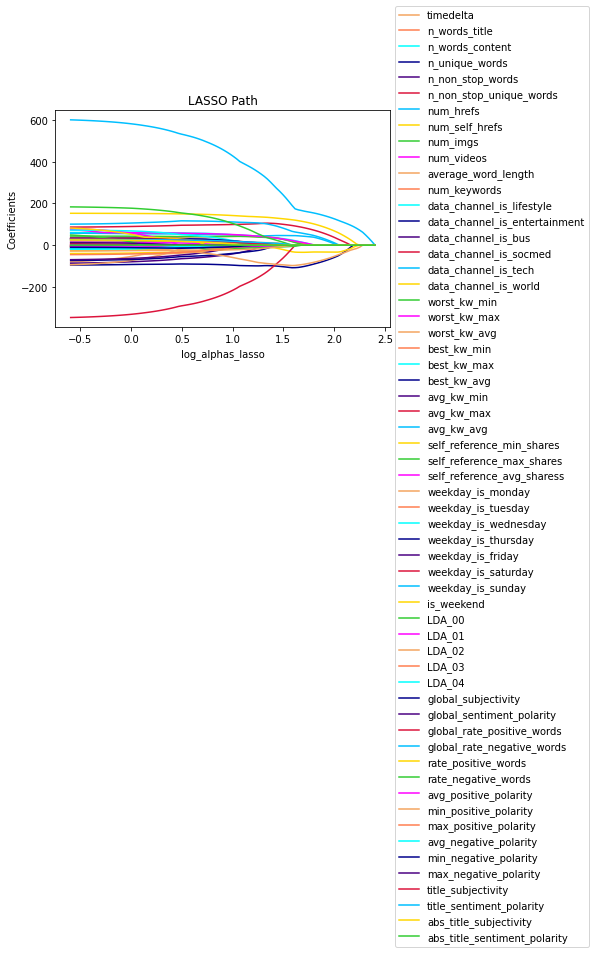

In [ ]:
# Plot out Lasso path attempting with the default alphas

alphas, coefs, _ = lasso_path(X = Train_x, y = df_train[target])

colors = cycle(['sandybrown', 'coral', 'cyan', 'darkblue', 'indigo', 'crimson', 'deepskyblue', 'gold', 'limegreen', 'magenta'])

log_alphas_lasso = np.log10(alphas)

for coef_l, c in zip(coefs, colors):
    l = plt.plot(log_alphas_lasso, coef_l, c=c)

plt.xlabel("log_alphas_lasso")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.legend(df[features].columns, 
            bbox_to_anchor = (1,1.5), 
            loc = "upper left")
plt.show()

In [ ]:
# Setting hyperparameters tunes how much to penalize beta
# --> each alpha will provide a diff value per coef

# selected alpha range from the above graph

alphas, coefs, _ = lasso_path(X = Train_x, y = df_train[target], 
                   alphas = [0,0.001,0.0001,.1,.5,1,5,10,20])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30799370770.118416, tolerance: 15581136.889700001
  positive,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74413384664.39308, tolerance: 15581136.889700001
  positive,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74850114485.02295, tolerance: 15581136.889700001
  positive,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexp

In [ ]:
# Coefficient's dataframe
df_coefs = pd.DataFrame(coefs, columns = alphas)
df_coefs.columns

Float64Index([20.0, 10.0, 5.0, 1.0, 0.5, 0.1, 0.001, 0.0001, 0.0], dtype='float64')

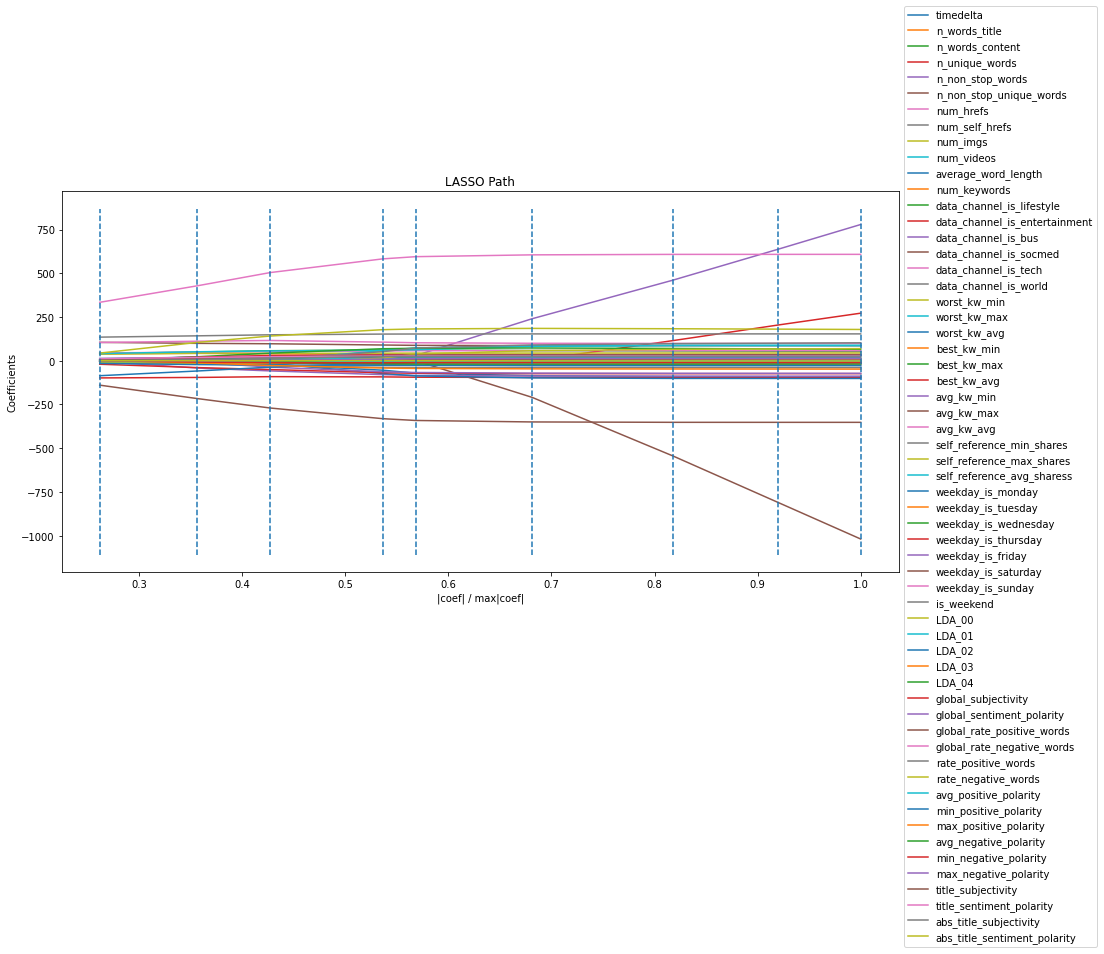

In [ ]:
# Plot out Lasso path with our range of selected alphas

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.subplots(figsize=(15, 7))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.legend(df[features].columns, 
            bbox_to_anchor = (1,1.5), 
            loc = "upper left")
plt.show()

In [ ]:
# Take a list of just 10 of the coef's
df_alpha_10 = pd.DataFrame({"Feature": df_train[features].columns.tolist(),
                           "Coefficients": df_coefs[10]
                           })

In [ ]:
# Sort by most relevant features
df_alpha_10.sort_values(by = 'Coefficients', ascending=False).head(3)

#or
#df_coefs.sort_values(by=5, ascending=False).head(3)

,Feature,Coefficients
26,avg_kw_avg,428.104258
37,is_weekend,142.088221
16,data_channel_is_tech,111.247534


In [ ]:
# Sort by least relevant features
# --> Anything which has converged onto 0 (of which there are plenty)

df_alpha_10[df_alpha_10['Coefficients'] == 0.0].head(3)

#or
#df_coefs.sort_values(by=10, ascending=True).head(3)

,Feature,Coefficients
1,n_words_title,-0.0
3,n_unique_words,0.0
5,n_non_stop_unique_words,0.0


In [ ]:
# Apply PCA 

pca = PCA()
X_reduced_train = pca.fit_transform(Train_x)

In [ ]:
# 3-fold CV, with shuffle

n_train = len(X_reduced_train)
kf_3 = model_selection.KFold(n_splits=3, 
                            shuffle=True, 
                            random_state=1)
regr = LinearRegression()
mse_train = []
mse_train_pca = []

# Calculate MSE with only the intercept (no principal components in regression)

score = -1*cross_val_score(regr, 
                            np.ones((n_train,1)), 
                            df_train[target].ravel(), 
                            cv = kf_3, 
                            scoring= 'neg_mean_squared_error').mean() 
mse_train.append(score)
#print(mse_train)

# Calculate MSE using CV for the 30 principle components, adding one component at the time on train data

for i in np.arange(1, 40):
    score = -1*cross_val_score(regr, 
                                X_reduced_train[:,:i],
                                df_train[target].ravel(), 
                                cv=kf_3, 
                                scoring = 'neg_mean_squared_error').mean()
    mse_train_pca.append(score)
    

##### Plot out the training/validation error curve corresponding to n_components

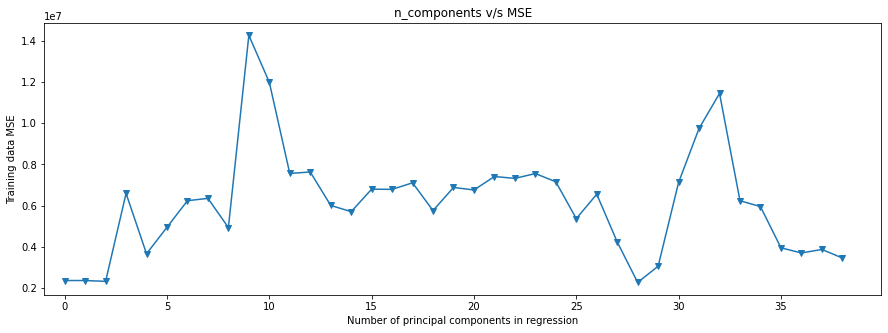

In [ ]:
# Plot error of results

plt.figure(figsize=(15,5))
plt.plot(mse_train_pca, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Training data MSE')
plt.title('n_components v/s MSE')
plt.xlim(xmin=-1);

##### Pick the best n_component and its corresponding training error

In [ ]:
index_min = np.argmin(mse_train_pca)
print(f'''best n_component = {index_min+1}
Corresponding MSE errror on training data after applying PCA = {min(mse_train_pca)}''')

res=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(f'\nexplained variance = {res}\n')
#print(f'explained variance = {res[index_min]}')

# discuss about variance

X_reduced_test = pca.transform(Test_y)[:,:index_min+1]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:index_min+1], df_train[target])

# Prediction with test data
pred = regr.predict(X_reduced_test)
print(f'Corresponding MSE errror on testing data after applying PCA = {mean_squared_error(df_test[target], pred)}')

best n_component = 29
Corresponding MSE errror on training data after applying PCA = 2263608.5631859866

explained variance = [ 8.23 15.21 21.32 26.41 31.2  35.64 39.93 43.88 47.52 51.1  54.46 57.64
 60.44 62.78 65.07 67.16 69.24 71.31 73.32 75.31 77.2  79.04 80.81 82.36
 83.83 85.2  86.42 87.58 88.71 89.74 90.72 91.62 92.5  93.29 94.08 94.83
 95.51 96.12 96.65 97.17 97.58 97.98 98.35 98.67 98.98 99.2  99.37 99.51
 99.65 99.75 99.84 99.91 99.95 99.99 99.99 99.99 99.99 99.99 99.99]

Corresponding MSE errror on testing data after applying PCA = 2175534.6645577084


### Explained Variance

Explained variance represents the information explained using a particular principal components (eigenvectors)
From the above graph it clearly shows the optimal prediction can be achived at 3 and 29 features, but 3 features options results in only 21% information explained hence best n_component is selected as 29 which provides 88.71% of information.

Ref: https://vitalflux.com/pca-explained-variance-concept-python-example/

### best lasso model

In [ ]:
# Cross validation with 3 folds

cv = RepeatedKFold(n_splits = 3, 
                    n_repeats = 3, 
                    random_state = 1)
lasso_alphas = np.linspace(0.1, 30.0, num=10)

# Grid search cross validation to find the best alpha

lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas

lasso_gscv = (GridSearchCV(lasso, 
                            grid, 
                            scoring = 'neg_mean_squared_error', 
                            cv = cv, 
                            n_jobs = -1))

lasso_model = lasso_gscv.fit(Train_x, df_train[target])

print('MSE: %.5f' % abs(lasso_model.best_score_))
print('Config: %s' % lasso_model.best_params_)

MSE: 2161787.19173
Config: {'alpha': 3.422222222222222}


Explanation: even with an alpha = 3 we still have many features which have NOT converged onto 0

### Best Ridge model

In [ ]:
# define model
ridge_lasso = np.linspace(0.1, 517, num=10)
rg_model = RidgeCV(alphas = ridge_lasso, 
                    cv = cv, 
                    scoring = 'neg_mean_squared_error')

# fit model
ridge_model = rg_model.fit(Train_x, df_train[target])

# summarize chosen configuration
print('alpha: %f' % rg_model.alpha_)
print('MSE: %.3f' % abs(ridge_model.best_score_))

alpha: 517.000000
MSE: 2166730.747


In [ ]:
results = []

# Ridge model

prediction_ridge = ridge_model.predict(Test_y)
mse_ridge = mean_squared_error(prediction_ridge.astype('int'), df_test[target])
results.append(mse_ridge)
print(f'Ridge MSE Error = {mse_ridge}')

Ridge MSE Error = 2141053.206164136


In [ ]:
# Lasso model

prediction_lasso = lasso_model.predict(Test_y)
mse_lasso = mean_squared_error(prediction_lasso.astype('int'), df_test[target])
results.append(mse_lasso)
print(f'Lasso MSE error = {mse_lasso}')

Lasso MSE error = 2142424.8628886477


In [ ]:
# PCA model

prediction_pca = regr.predict(X_reduced_test)
mse_pca = mean_squared_error(prediction_pca.astype('int'), df_test[target])
results.append(mse_pca)
print(f'PCA MSE error = {mse_pca}')


PCA MSE error = 2175550.4306760663


In [ ]:
# Create new DF

table_df = pd.DataFrame()
table_df['mse'] = results
table_df['models'] = ['ridge','lasso','pca']
table_df

,mse,models
0,2.141053e+06,ridge
1,2.142425e+06,lasso
2,2.175550e+06,pca


Text(0.5, 1.0, 'MSE Error versus Models')

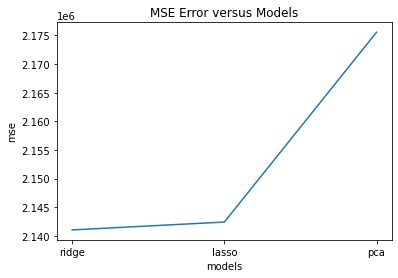

In [ ]:
# Make a line plot of our 3 different models

sns.lineplot(data = table_df, x='models', y='mse')
plt.title("MSE Error versus Models")

SOURCE: https://www.publichealth.columbia.edu/research/population-health-methods/least-absolute-shrinkage-and-selection-operator-lasso 

"As s decreases toward 0, the beta coefficients shrink toward zero with the least associated beta coefficients decreasing all the way to 0 before the more strongly associated beta coefficients. As a result, numerous beta coefficients that are not strongly associated with the outcome are decreased to zero, which is equivalent to removing those variables from the model. In this way, the LASSO can be used as a variable selection method."

LASSO seems to be functioning similar to PCA in that it is a way of selecting "components" or variables that are most relevant to our intended outcome of "shares." You can see the result of the coefficients shrinking towards 0 in our plotted graph at the top of the notebook. Many of the original features (which should be ~60) end up dropping off and become 0. 

SOURCE: https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

"Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response)."

SOURCE: https://en.wikipedia.org/wiki/Principal_component_analysis

PCA is more sensitive to outliers, of which we may have many in this dataset. We should probably be removing the outliers during preprocessing, but it's difficult to clearly determine here what would be considered an outlier or not, but our PCA results are most likely being heavily skewed in our dataset.